<a href="https://colab.research.google.com/github/Neeraj4788/Case-study-portfolio/blob/main/HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Data Exploration and Cleaning

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Afame Technology/HR Data.csv')

Mounted at /content/drive


In [4]:
# Check the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1470
Number of columns: 35


In [5]:
# Check data types and summary statistics
print(df.dtypes)
print(df.describe())

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Handle missing values
df.dropna(inplace=True)

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

##2. Descriptive Analysis

In [8]:
# Calculate descriptive statistics
mean_income = df['MonthlyIncome'].mean()
median_satisfaction = df['JobSatisfaction'].median()

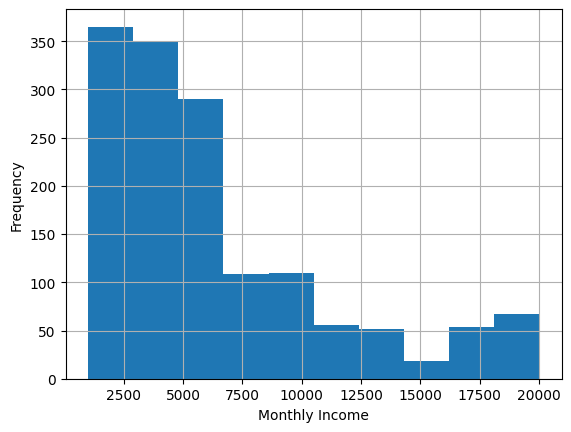

In [11]:
# Generate histograms
df['MonthlyIncome'].hist()
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

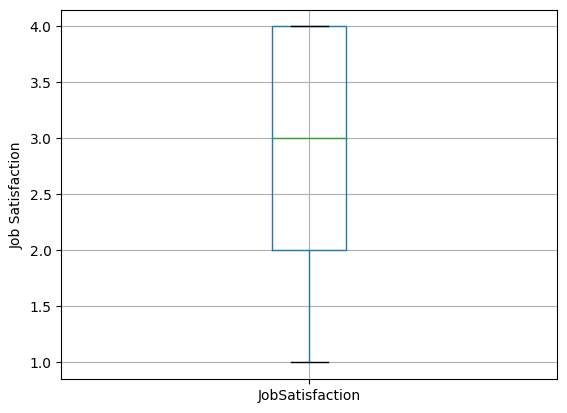

In [12]:
# Generate box plots
df.boxplot(column='JobSatisfaction')
plt.ylabel('Job Satisfaction')
plt.show()

##3.Job Satisfaction Analysis

In [13]:
# Calculate overall job satisfaction level
overall_satisfaction = df['JobSatisfaction'].mean()

In [14]:
# Analyze variations based on job role or department using groupby operations
role_satisfaction = df.groupby('JobRole')['JobSatisfaction'].mean()
department_satisfaction = df.groupby('Department')['JobSatisfaction'].mean()

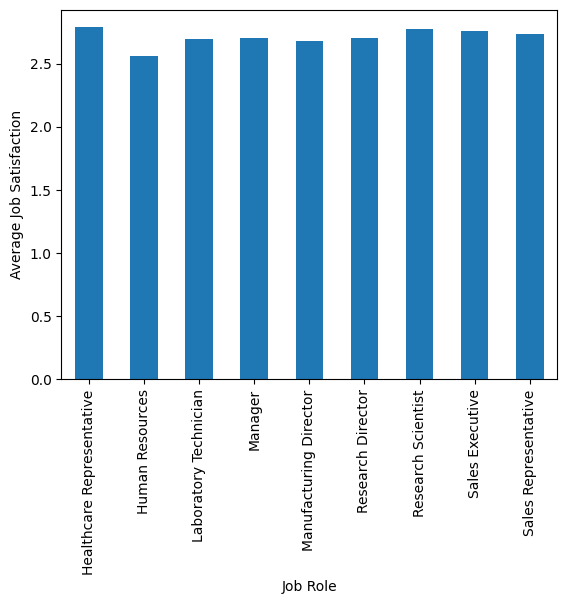

In [15]:
# Generate bar charts for job role and department satisfaction levels
role_satisfaction.plot(kind='bar', xlabel='Job Role', ylabel='Average Job Satisfaction')
plt.show()

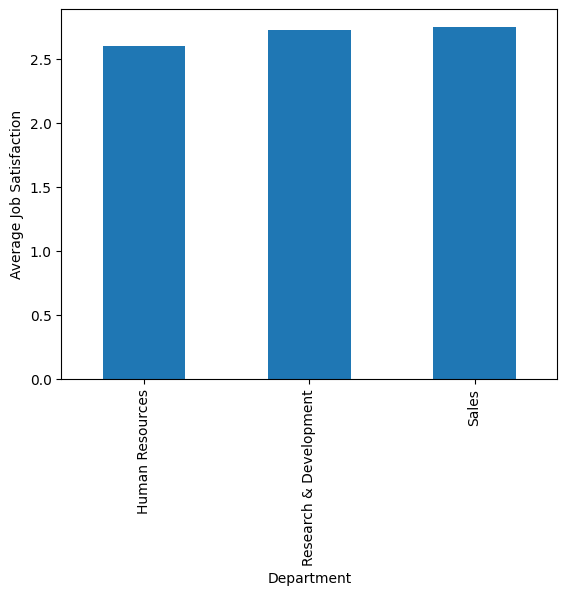

In [16]:
department_satisfaction.plot(kind='bar', xlabel='Department', ylabel='Average Job Satisfaction')
plt.show()

##4.Marital Status Analysis

In [17]:
import scipy.stats as stats

In [18]:
# Perform t-tests or ANOVA to analyze correlation between marital status and job satisfaction/performance ratings
marital_satisfaction = df.groupby('MaritalStatus')['JobSatisfaction'].mean()
marital_performance = df.groupby('MaritalStatus')['PerformanceRating'].mean()

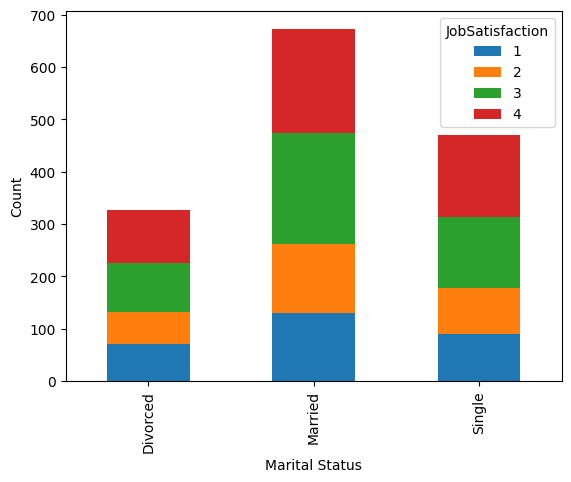

In [19]:
# Generate stacked bar charts to compare job satisfaction levels across marital statuses
df_marital = pd.crosstab(df['MaritalStatus'], df['JobSatisfaction'])
df_marital.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

##5.Monthly Income Analysis

In [20]:
import seaborn as sns

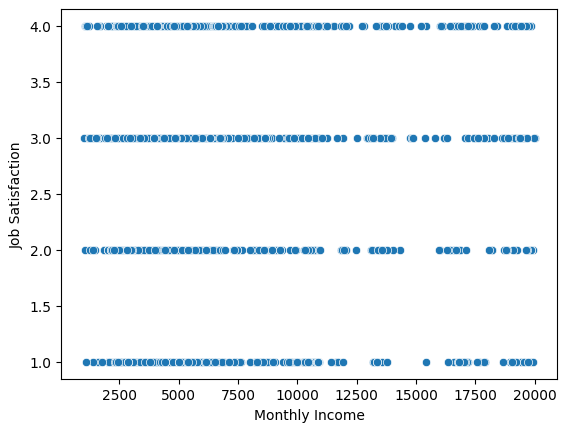

In [21]:
# Scatter plot to analyze correlation between monthly income and job satisfaction
sns.scatterplot(data=df, x='MonthlyIncome', y='JobSatisfaction')
plt.xlabel('Monthly Income')
plt.ylabel('Job Satisfaction')
plt.show()

In [22]:
# Compare average job satisfaction levels between higher-income and lower-income employees
higher_income = df[df['MonthlyIncome'] > df['MonthlyIncome'].median()]
lower_income = df[df['MonthlyIncome'] <= df['MonthlyIncome'].median()]

In [23]:
mean_satisfaction_higher_income = higher_income['JobSatisfaction'].mean()
mean_satisfaction_lower_income = lower_income['JobSatisfaction'].mean()

##6.Overtime Work Analysis

In [24]:
# Compare job satisfaction levels between employees who work overtime and those who don't
overtime_satisfaction = df.groupby('OverTime')['JobSatisfaction'].mean()

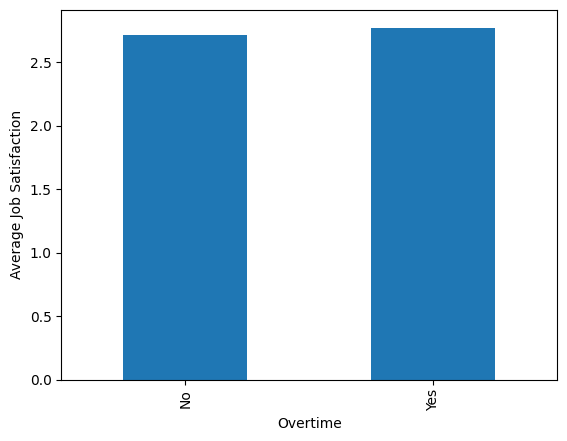

In [25]:
# Bar chart to visualize the comparison
overtime_satisfaction.plot(kind='bar', xlabel='Overtime', ylabel='Average Job Satisfaction')
plt.show()

##7.Tenure Analysis

In [26]:
# Calculate the average tenure of employees in the company
average_tenure = df['YearsAtCompany'].mean()

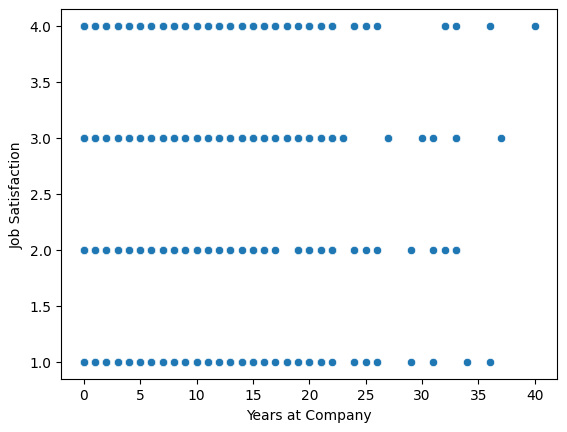

In [27]:
# Scatter plot to analyze correlation between tenure and job satisfaction/performance ratings
sns.scatterplot(data=df, x='YearsAtCompany', y='JobSatisfaction')
plt.xlabel('Years at Company')
plt.ylabel('Job Satisfaction')
plt.show()

##8. NumCompaniesWorked Analysis

In [28]:
# Compare job satisfaction levels between employees with different numbers of company experiences
num_companies_satisfaction = df.groupby('NumCompaniesWorked')['JobSatisfaction'].mean()

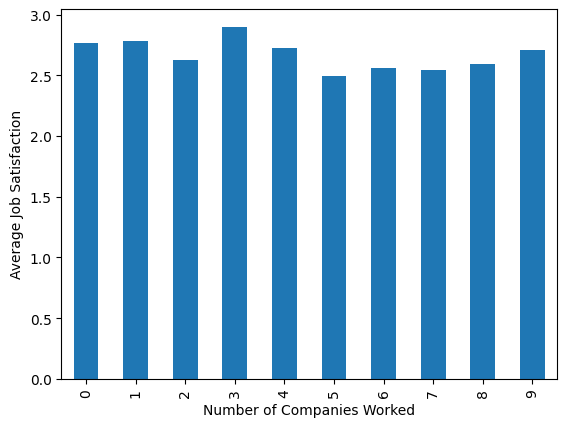

In [29]:
# Bar chart to visualize the comparison
num_companies_satisfaction.plot(kind='bar', xlabel='Number of Companies Worked', ylabel='Average Job Satisfaction')
plt.show()

##9. Training Analysis

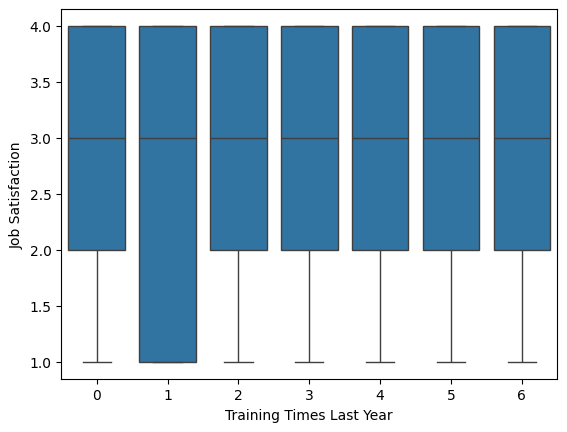

In [30]:
# Analyze the impact of training on job satisfaction
sns.boxplot(data=df, x='TrainingTimesLastYear', y='JobSatisfaction')
plt.xlabel('Training Times Last Year')
plt.ylabel('Job Satisfaction')
plt.show()

##10. Work-Life Balance Analysis

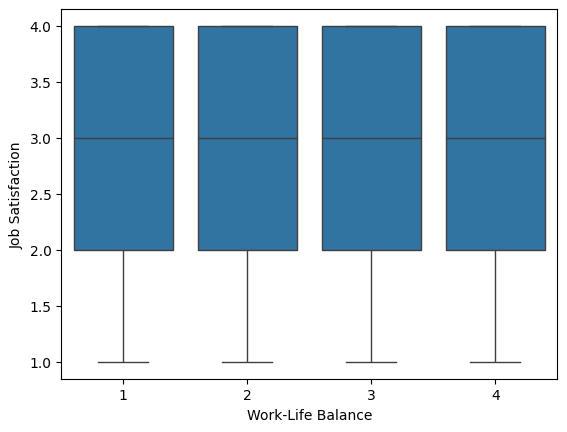

In [31]:
# Analyze the relationship between work-life balance and job satisfaction/performance ratings
sns.boxplot(data=df, x='WorkLifeBalance', y='JobSatisfaction')
plt.xlabel('Work-Life Balance')
plt.ylabel('Job Satisfaction')
plt.show()